In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [2]:
college_df = pd.read_csv('Resources/salaries_by_college_type_data.csv')
region_df = pd.read_csv('Resources/salaries_by_region_data.csv')
majors_df = pd.read_csv('Resources/degrees_that_pay_back_data.csv')

datasets_list = [college_df, region_df, majors_df]

In [3]:
college_columns = {
    "School Name" : "name",
    "School Type" : "type",
    "Starting Median Salary" : "start_p50",
    "Mid-Career Median Salary" : "mid_p50",
    "Mid-Career 10th Percentile Salary" : "mid_p10",
    "Mid-Career 25th Percentile Salary" : "mid_p25",
    "Mid-Career 75th Percentile Salary" : "mid_p75",
    "Mid-Career 90th Percentile Salary" : "mid_p90",
    "In State Tuition" : "in_tuition",
    "Out of State Tuition" : "out_tuition"
}

college_df.rename(columns=college_columns, inplace=True)

region_columns = {
    "School Name" : "name",
    "Region" : "region",
    "Starting Median Salary" : "start_p50",
    "Mid-Career Median Salary" : "mid_p50",
    "Mid-Career 10th Percentile Salary" : "mid_p10",
    "Mid-Career 25th Percentile Salary" : "mid_p25",
    "Mid-Career 75th Percentile Salary" : "mid_p75",
    "Mid-Career 90th Percentile Salary" : "mid_p90",
    "In State Tuition" : "in_tuition",
    "Out of State Tuition" : "out_tuition"
}

region_df.rename(columns=region_columns, inplace=True)

majors_columns = {
    "Undergraduate Major" : "name",
    "Starting Median Salary" : "start_p50",
    "Mid-Career Median Salary" : "mid_p50",
    "Percent change from Starting to Mid-Career Salary" : "increase",
    "Mid-Career 10th Percentile Salary" : "mid_p10",
    "Mid-Career 25th Percentile Salary" : "mid_p25",
    "Mid-Career 75th Percentile Salary" : "mid_p75",
    "Mid-Career 90th Percentile Salary" : "mid_p90"
}

majors_df.rename(columns=majors_columns, inplace=True)

In [4]:
selected_columns = ["start_p50", "mid_p50", "mid_p10", "mid_p25", "mid_p75", "mid_p90"]

for dataset in datasets_list:
    for column in selected_columns:
        dataset[column] = dataset[column].str.replace("$","")
        dataset[column] = dataset[column].str.replace(",","")
        dataset[column] = pd.to_numeric(dataset[column])

In [5]:
# Storyline: We are a student who just graduated from high school who is interested in STEM.
# which school will give us the most "bang for our buck?"
# first graph tuitions by school type (both in and out of state) - avg out of state will be higher than in state
# second graph for the starting salaries for the top STEM majors (accounting, aerosapce, biology, chemical engineering/
#        chemistry, civil engineering, computer engineering, computer science, electrical engineering, finance, 
#        industrial engineering, information technology, MIS, math, mech. engineering, physics) - avg salary will be higher than $50K
# third graph out of state tuition for the top STEM schools (see forbes list) - MIT will have the highest tuition/
#        avg cost of tuition will be $50K(per year)
# fourth graph out of state tuition for state schools  - avg tuition cost for state $30K (per year)

In [6]:
majors_df.head(18)

,name,start_p50,mid_p50,increase,mid_p10,mid_p25,mid_p75,mid_p90
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Biology,38800.0,64800.0,67.0,36900.0,47400.0,94500.0,135000.0
3,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
4,Chemistry,42600.0,79900.0,87.6,45300.0,60700.0,108000.0,148000.0
5,Civil Engineering,53900.0,90500.0,67.9,63400.0,75100.0,115000.0,148000.0
6,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
7,Computer Science,55900.0,95500.0,70.8,56000.0,74900.0,122000.0,154000.0
8,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
9,Finance,47900.0,88300.0,84.3,47200.0,62100.0,128000.0,195000.0


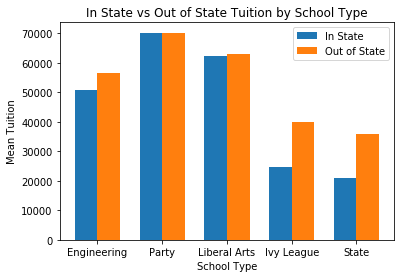

In [7]:
# TUITIONS BY SCHOOL TYPE: first graph

in_state_type = college_df.groupby("type")["in_tuition"].mean()

out_state_type = college_df.groupby("type")["out_tuition"].mean()

index = np.arange(5)
bar_width = 0.35

fig, ax = plt.subplots()
instate = ax.bar(index, in_state_type, bar_width,
                label="In State")

outstate = ax.bar(index+bar_width, out_state_type,
                 bar_width, label="Out of State")

ax.set_xlabel('School Type')
ax.set_ylabel('Mean Tuition')
ax.set_title('In State vs Out of State Tuition by School Type')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Engineering","Party", "Liberal Arts", "Ivy League","State"])
ax.legend()

plt.show()

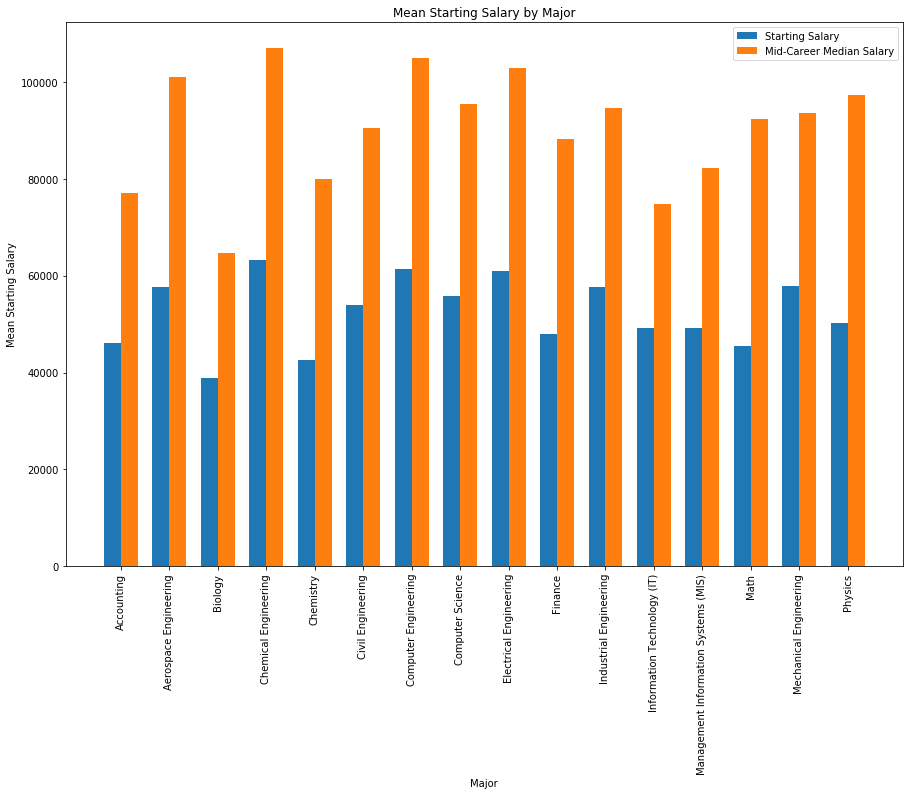

In [18]:
# STARTING SALARIES FOR STEM: second graph; stretch grpah so not overlapping

index = np.arange(16)
bar_width = 0.35

fig, ax = plt.subplots(1,1,figsize=(15,10))
st_salary = ax.bar(index, majors_df["start_p50"], bar_width,
                label="Starting Salary")
med_salary = ax.bar(index+bar_width, majors_df["mid_p50"],
                 bar_width, label="Mid-Career Median Salary")

ax.set_xlabel('Major')
ax.set_ylabel('Mean Starting Salary')
ax.set_title('Mean Starting Salary by Major')
ax.set_xticks(index + bar_width / 2)
plt.xticks(rotation = "vertical")
ax.set_xticklabels(majors_df["name"], ha="center")
ax.legend()
#ax.figure(figsize=(20,15))

plt.show()